# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href='#References'>References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue.
The columns in the dataset are:
1. id - the movie's ID
2. imdb_id - The movie's ID in IMDB database beginning with string "tt"
3. popularity - The movie's Popularity in %
4. budget - The movie's budget in US Dollars
5. revenue - The money generated by the movie in US Dollars
6. original_title - The title of the movie
7. cast - This column includes the list of movie actors seperated by "|"
8. homepage - The movie's website
9. director - The movie's director
10. tagline - The movie's slogan or catchphrase used in promotional materials
11. keywords - Words or phrases associated with the movie
12. overview - The short analysis of the movie explaining the what happens in the movie.  
13. runtime - The movie's runtime in minutes
14. genres - This column includes the list of genres associated with movie seperated by "|"
15. production_companies - The column includes a list of companies associated with the production of the movie seperated by "|" if more than one.
16. release_date - The release of the movie in the format MM/DD/YY
17. vote_count - The number of people that voted for the movie
18. vote_average - The overall rating of a movie in the scale of 1 - 10 
19. release_year - The movie's release date in the format in YYYY
20. budget_adj -  The budget of the movie accounting from inflation over time from the 2010s
21. revenue_adj -  The revenue of the movie accounting from inflation over time from the 2010s


### Question(s) for Analysis
The questions are: 
1. Does the popularity of a movie affect the revenue it makes ?
2. Is popularity of a movie directly correlated with the vote_count?
3. Which genres of movies are the most popular each year and the genre with highest average popularity over the years?
4. Who are the top Directors with the most movies in this dataset and does this affect the revenue a movie makes?


In [2]:
# importing necessary packages
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# loading the data from TMDB Movie Dataset
df_TMDb_01 = pd.read_csv('tmdb-movies.csv')

# printing a few lines of the dataset
df_TMDb_01.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# getting the info on the dataset such as the number of the samples
# and data type of each column
print(df_TMDb_01.info())

# checking the number of rows
print('\nThe number of rows in this dataset is: ', df_TMDb_01.shape[0])

# checking the number of columns
print('\nThe number of columns in this dataset is: ', df_TMDb_01.shape[1])

# checking if any data is duplicated in the the dataset
print("\nThe number of duplicated data in this dataset is:",len(df_TMDb_01[df_TMDb_01.duplicated()]))

# checking the columns that have any null value
print("\nThe columns with any null values are:",df_TMDb_01.columns[df_TMDb_01.isnull().any()].tolist())

# checking for duplicated rows in the dataset
print('\nThe duplicated row(s) are: \n')
df_TMDb_01[df_TMDb_01.duplicated()]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
print('\n Useful statistics about each column:\n')
df_TMDb_01.describe()


 Useful statistics about each column:



,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
I will:
1. Drop duplicate(s) from the dataset
2. Changing the data type of release_year from string to datetime
3. The columns - budget, revenue, budget_adj and revenue_adj should be renamed because they refer to money in US Dollars 
4. Dropping columns with null values



In [7]:
# Cleaning the data

# 1. Dropping duplicates from the dataset
df_TMDb_01.drop_duplicates(inplace=True)

# 2. Changing the data types of release_date and year to datetime
df_TMDb_01['release_date'] = pd.to_datetime(df_TMDb_01['release_date'])
df_TMDb_01.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

In [8]:
# 3 (I). Renaming the colums to accurately represent the columns
# Here I am assuming popularity is in percentage
df_TMDb_01.rename(columns = {'popularity' : 'popularity_(%)','runtime': 'runtime_(minutes)','budget':'budget_($)', 'revenue':'revenue_($)', 'budget_adj':'budget_adj_($)', 'revenue_adj':'revenue_adj_($)'}, inplace = True)
df_TMDb_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity_(%)          10865 non-null float64
budget_($)              10865 non-null int64
revenue_($)             10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime_(minutes)       10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj_($)   

In [9]:
# 3 (II). Formating the last 2 columns to accurately represent currency
# For the budget_adj_($) and revenue_adj_($) since they are of the integer datatype

# Here I tried formatting the columns to appropriately represent currency but ran into some trouble when visualizing the data
# So it is commented here
# df_TMDb_01['budget_($)'] = df_TMDb_01['budget_($)'].map(lambda x: f'{x:,}')
# df_TMDb_01['revenue_($)'] = df_TMDb_01['revenue_($)'].map(lambda x: f'{x:,}')

df_TMDb_01['budget_adj_($)'] = df_TMDb_01['budget_adj_($)'].astype(np.int64)
df_TMDb_01['revenue_adj_($)'] = df_TMDb_01['revenue_adj_($)'].astype(np.int64)
df_TMDb_01.head()

,id,imdb_id,popularity_(%),budget_($),revenue_($),original_title,cast,homepage,director,tagline,...,overview,runtime_(minutes),genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_($),revenue_adj_($)
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801


In [86]:
# checking the datatypes of budget_adj_($) and revenue_adj_($) are integer
df_TMDb_01.dtypes

id                               int64
imdb_id                         object
popularity_(%)                 float64
budget_($)                       int64
revenue_($)                      int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime_(minutes)                int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj_($)                   int64
revenue_adj_($)                  int64
dtype: object

In [13]:
# 4. View missing value count for each column
# df_TMDb_01.isnull().sum()

#  Drop rows with any null values
# df_TMDb_01.dropna(inplace=True)

# checks if any of columns have null values
# False shows that they aren't any null values in the dataset 
df_TMDb_01.isnull().sum().any()

False

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Does the popularity of a movie affect the revenue it makes?

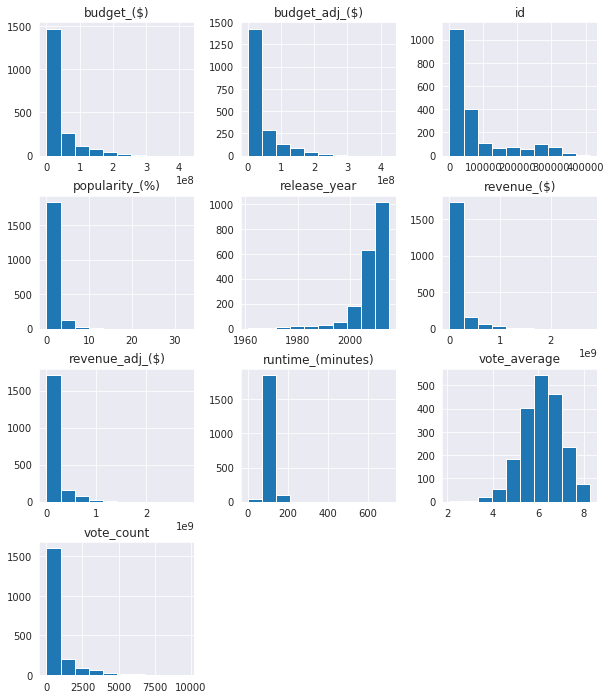

In [31]:
# visualization of the features with numerical data of the movies dataset using a histogram
df_TMDb_01.hist(figsize=(10,12));

Text(0,0.5,'Revenue (USD Billions)')

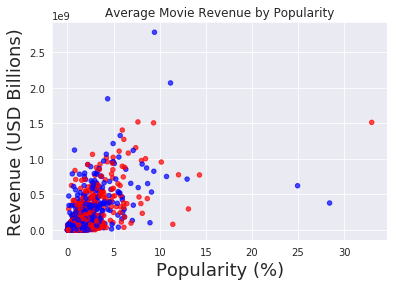

In [97]:
# scatter plot distribution of popularity against revenue
colors = np.array(['red', 'blue'])
df_TMDb_01.plot(kind='scatter',x='popularity_(%)', y='revenue_($)', color=colors, alpha=.7);
plt.title('Average Movie Revenue by Popularity')
plt.xlabel('Popularity (%)', fontsize=18)
plt.ylabel('Revenue (USD Billions)', fontsize=18)

### Research Question 2  - Is popularity of a movie directly correlated with the vote_count?

Text(0,0.5,'Vote Count')

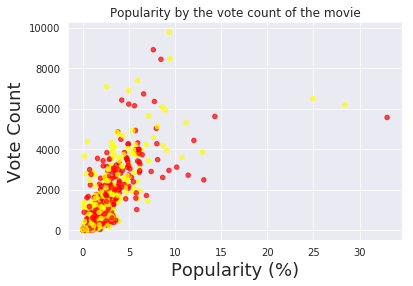

In [98]:
# scatter plot distribution of popularity against vote count
colors = np.array(['red', 'yellow'])
df_TMDb_01.plot(kind='scatter',x='popularity_(%)', y='vote_count', color=colors, alpha=.7);
plt.title('Popularity by the vote count of the movie')
plt.xlabel('Popularity (%)', fontsize=18)
plt.ylabel('Vote Count', fontsize=18)

### Research Question 3 - Which genres of movies are the most popular each year and the genre with highest average popularity over the years?

In [99]:
# Here, I split the data in genres column since they are seperarted by '|'
# Also I created a copy of the original dataset becaues I didn't want to 
# mess with the original dataset if I made an error

df_TMDb_genres_by_year  = df_TMDb_01.copy()
df_TMDb_genres_by_year['genres'] = df_TMDb_genres_by_year['genres'].str.split('|')

# transform each element of the genre column into to a row
df_TMDb_genres_by_year = df_TMDb_genres_by_year.explode('genres')

# getting the mean popularity and grouping it by the release_year and genres of the movie
df_TMDb_genres_by_year = df_TMDb_genres_by_year.groupby(['release_year','genres'])['popularity_(%)'].mean()

# getting the genre with largest poplularity mean in ascending order
df_TMDb_genres_by_year = df_TMDb_genres_by_year.groupby(level='release_year').nlargest(1)

# checking the data, there is an extra column of release year 
# df_TMDb_genres_by_year.head()

# Reference - 1
# removing the duplicated columns by resetting the index by removing the release_year column
df_TMDb_genres_by_year = df_TMDb_genres_by_year.reset_index(level=0, drop=True)

# resetting the index again to put id for each row
df_TMDb_genres_by_year = df_TMDb_genres_by_year.reset_index()

df_TMDb_genres_by_year.head(54)

,release_year,genres,popularity_(%)
0,1961,Comedy,0.303783
1,1962,Action,3.170651
2,1963,Action,2.508235
3,1964,Action,3.153791
4,1965,Action,1.910465
5,1967,Action,1.554808
6,1969,Action,1.778746
7,1970,Comedy,0.374514
8,1971,Adventure,1.755117
9,1972,Crime,5.738034


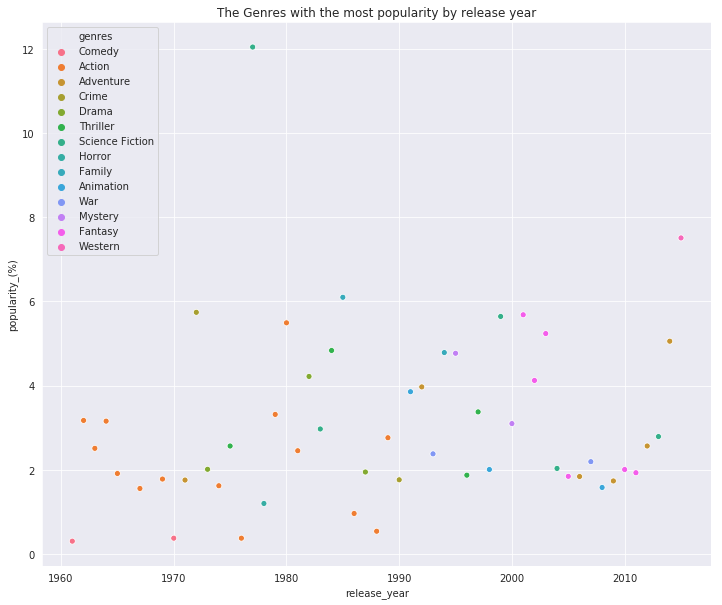

In [30]:
# A scatter plot for the visualization of the above data
plt.figure(figsize=(12,10))
plt.title("The Genres with the most popularity by release year")
sns.scatterplot(data=df_TMDb_genres_by_year, x="release_year", y="popularity_(%)", hue="genres");

In [76]:
#  checking the genres with the highest average popularity over the years
df_TMDb_genres_by_year.groupby(['genres'])['popularity_(%)'].mean()

genres
Action             2.256031
Adventure          2.818341
Animation          2.478894
Comedy             0.339148
Crime              3.749598
Drama              2.724074
Family             5.438990
Fantasy            3.468489
Horror             1.198849
Mystery            3.930492
Science Fiction    5.092985
Thriller           3.159826
War                2.284348
Western            7.504550
Name: popularity_(%), dtype: float64

### Research Question 4 - Who are the top Directors with the most movies in this dataset and does this affect the revenue a movie makes?

Text(0,0.5,'Number of Movies made')

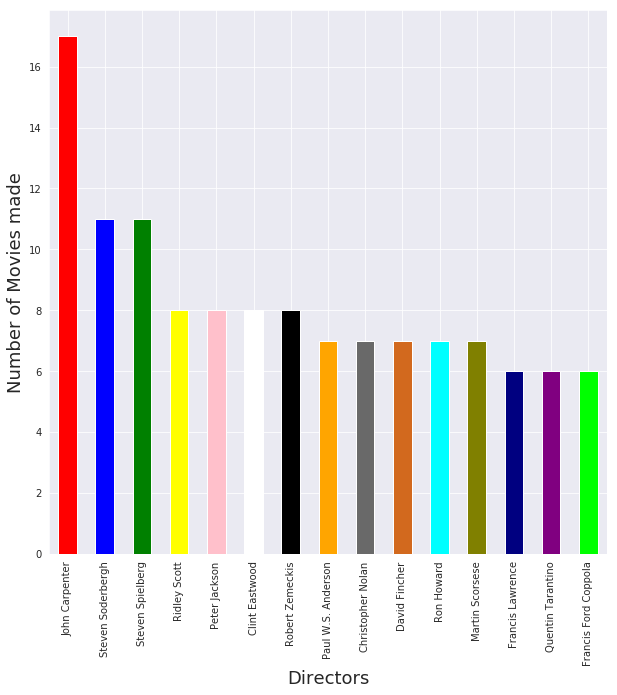

In [19]:
colors = np.array(['red', 'blue', 'green', 'yellow', 'pink', 'white', 'black', 'orange', 'dimgray', 'chocolate', 'cyan', 'olive', 'navy', 'purple', 'lime'])
df_TMDb_directors = df_TMDb_01['director'].value_counts().head(15)
df_TMDb_directors.plot(kind="bar", color=colors, figsize=(10, 10));
plt.xlabel('Directors', fontsize=18)
plt.ylabel('Number of Movies made', fontsize=18)

In [123]:
# Does the director of a movie contribute to the revenue the movie makes
df = df_TMDb_01.groupby(['director', 'original_title'])['revenue_($)'].max()

# This converts our series to dataframe object
df2 = df.to_frame()

# Here we print out the director and the movie with highest revenue in the dataset
print(df2[df2['revenue_($)'] == df2['revenue_($)'].max()])

                              revenue_($)
director      original_title             
James Cameron Avatar           2781505847


<a id='conclusions'></a>
## Conclusions
My report was on the analysis of the The Movie Database (TMDb) to determine the answers to these four questions.

1. Does the popularity of a movie affect the revenue it makes ?
2. Is popularity of a movie directly correlated with the vote_count?
3. Which genres of movies are the most popular each year and the genre with highest average popularity over the years ?
4. Who are the top Directors with the most movies in this dataset and does this affect the revenue a movie makes ?

From the above visualizations and analysis:
1. It can be dedeuced from the scatter plot that popularity of a movie among movie goers/watchers has a positive correlation the movie makes as revenue. 

2. Also, it can be said that that the popularity of movie can be attributed to its vote count collated through the vote of different movie goers/watchers. 

3. It can be said that the most popular genre over the years is Action that means individuals have the tendency to watch action movies and the movie genre with the highest average popularity over the year varied, but the Western genre was the genre that had the highest average popularity across the most years. This may be because westerns are more serious or niche productions and less of them are produced. 

4. From the above graph we can see that the director with the most movies made in this dataset is "John Carpenter" but though he has directed most movies in this dataset. His movie is not the one with the highest revenue earning so as such the director of a movie is not strongly associated with the revenue it makes. 


### Limitations
Further Analysis will help in factoring out statistical outliers thereby eliminating bias in movies with very high or low popularity rating and low vote_count values.  
Also, the genres column was originally in some list-like object seperated by "|", I assume that there were some genres lost when it was split and exploded so my analysis of the movie genres may not account for all of them.

In [124]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset - TMDb Movie Data.ipynb'])

0

<a id='References'></a>
## References

1. Code for reset_index gotten from [here](https://www.machinelearningplus.com/pandas/pandas-reset-index/#:~:text=To%20reset%20the%20index%20in,()%20with%20the%20dataframe%20object.&text=On%20applying%20the%20.,dataframe%20as%20a%20separate%20column)
2. The online documentations of pandas, numpy, and matplotlib for sns.scatterplot() and others